In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv(r'C:\Users\Asus\Desktop\sonar data.csv', header=None)

In [56]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [58]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [60]:
sonar_data.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [62]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [64]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [66]:
# separating data and Labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [69]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [73]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [75]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

In [77]:
model = LogisticRegression()

In [79]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [81]:
 #accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on test data : ', test_data_accuracy)

In [83]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['M']
The object is a mine



# Comparing Classification Models: Logistic Regression, Random Forest, SVM, and KNN

Yes, you can definitely extend your analysis beyond logistic regression to include Random Forest, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN). This approach allows you to compare multiple models and select the best performer for your specific dataset.

Here's how you can implement all four classification models in a Jupyter notebook:



## Key Differences Between These Models:

1. **Logistic Regression**:
   - Linear model, fast to train
   - Highly interpretable (feature coefficients)
   - Works well with linearly separable data
   - Less effective with complex relationships

2. **Random Forest**:
   - Ensemble method, handles non-linear relationships well
   - Provides feature importance
   - Resistant to overfitting
   - No need for feature scaling

3. **Support Vector Machine (SVM)**:
   - Effective in high-dimensional spaces
   - Works well with clear margin of separation
   - Sensitive to feature scaling
   - Can be slow on larger datasets

4. **K-Nearest Neighbors (KNN)**:
   - Simple, intuitive algorithm
   - No training phase (lazy learner)
   - Sensitive to feature scaling
   - Performance degrades with high dimensions

For more advanced analysis, you might also consider:
- Hyperparameter tuning using GridSearchCV
- Feature selection techniques
- Ensemble methods combining multiple models

This approach will give you a comprehensive comparison to determine which model works best for your specific classification problem.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data (no indentation here)
rf = pd.read_csv(r'C:\Users\Asus\Desktop\sonar data.csv')

# Check the data
print(rf.head())
print(rf.shape)

# Assuming the last column is your target variable
X = rf.iloc[:, :-1]  # All columns except the last one
y = rf.iloc[:, -1]   # Only the last column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")

# 2. Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# 3. SVM
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# 4. KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.0078  R  
2  0.0040  0.0117  R  


Dataset shape: (207, 61)

First few rows:
   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0

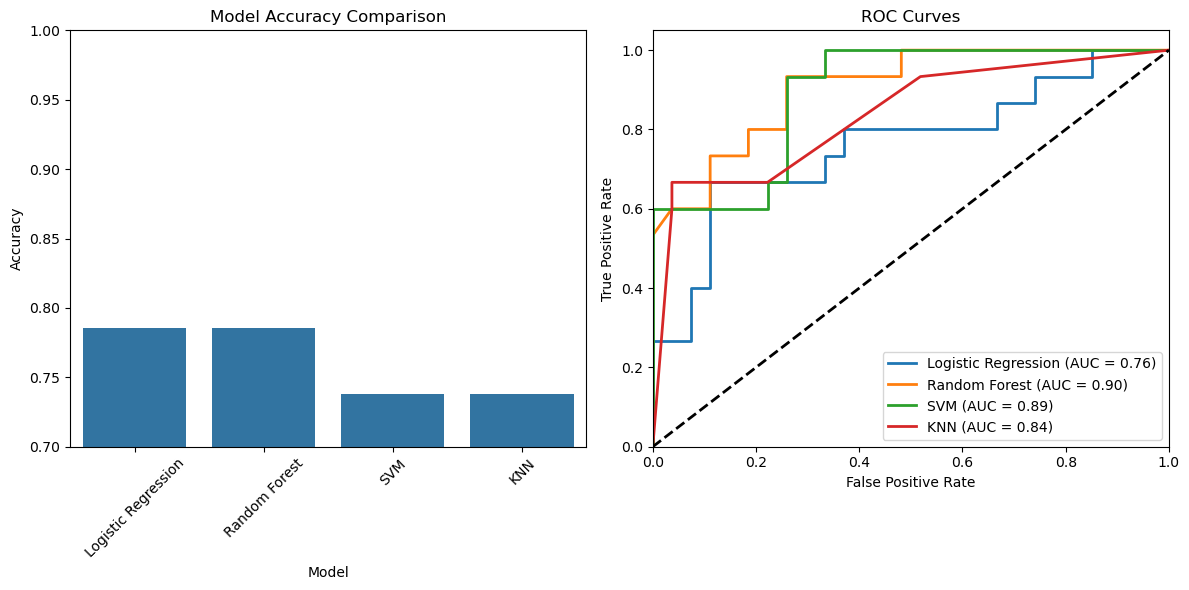


DETAILED ANALYSIS OF Logistic Regression

Confusion Matrix:


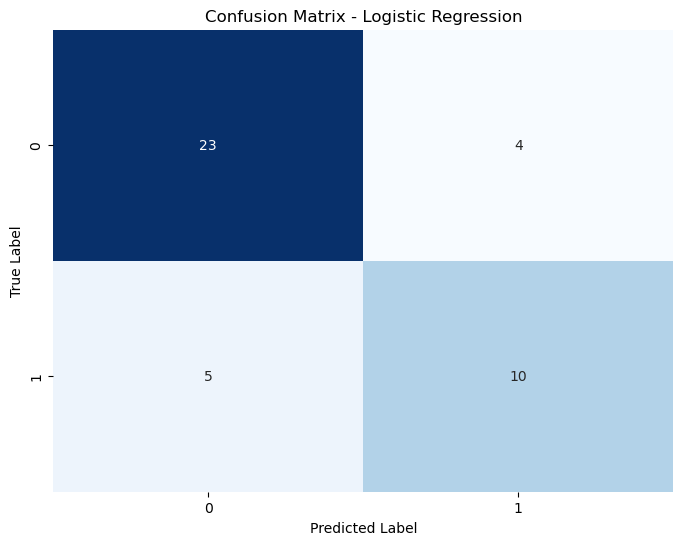


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.71      0.67      0.69        15

    accuracy                           0.79        42
   macro avg       0.77      0.76      0.76        42
weighted avg       0.78      0.79      0.78        42



In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the data
rf = pd.read_csv(r'C:\Users\Asus\Desktop\sonar data.csv')

# Check the data
print("Dataset shape:", rf.shape)
print("\nFirst few rows:")
print(rf.head())

# Assuming the last column is your target variable
X = rf.iloc[:, :-1]  # All columns except the last one
y = rf.iloc[:, -1]   # Only the last column

# Encode target variable if it's categorical (e.g., 'R' and 'M')
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print(f"\nTarget classes encoded: {le.classes_} → {np.unique(y)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate all models
results = {}
predictions = {}
probabilities = {}

print("\n" + "="*50)
print("MODEL TRAINING AND EVALUATION")
print("="*50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for all except Random Forest
    if name == 'Random Forest':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    predictions[name] = y_pred
    probabilities[name] = y_proba
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Cross-validation for more robust evaluation
    if name == 'Random Forest':
        cv_scores = cross_val_score(model, X, y, cv=5)
    else:
        cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5)
    print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Find the best model
best_model = max(results, key=results.get)
print("\n" + "="*50)
print(f"BEST MODEL: {best_model} with accuracy {results[best_model]:.4f}")
print("="*50)

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
}).sort_values('Accuracy', ascending=False)

print("\nModel Accuracy Ranking:")
print(results_df)

# Visualize the results
plt.figure(figsize=(12, 6))

# Bar plot for accuracy comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)  # Adjust as needed for your results

# ROC curves for all models
plt.subplot(1, 2, 2)
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, probabilities[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Detailed analysis of the best model
best_y_pred = predictions[best_model]

print("\n" + "="*50)
print(f"DETAILED ANALYSIS OF {best_model}")
print("="*50)

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, best_y_pred))

# Feature importance for Random Forest (if it's the best model)
if best_model == 'Random Forest':
    importances = models['Random Forest'].feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.tight_layout()
    plt.show()